<a href="https://www.kaggle.com/code/riyosha/rwanda-co2-prediction?scriptVersionId=191814665" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


Exploratory Data Analysis

In [2]:
# this notebook has picked many ideas from ambrosm's notebook on this dataset
# https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense/notebook


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [4]:
data_path = '/kaggle/input/playground-series-s3e20'
train_data = pd.read_csv(data_path+'/train.csv')
test_data = pd.read_csv(data_path+'/test.csv')
samplesubmission = pd.read_csv(data_path+'/sample_submission.csv')


In [5]:
train_data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [6]:
test_data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [7]:
samplesubmission.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,81.94
1,ID_-0.510_29.290_2022_01,81.94
2,ID_-0.510_29.290_2022_02,81.94
3,ID_-0.510_29.290_2022_03,81.94
4,ID_-0.510_29.290_2022_04,81.94


In [8]:
train_data.shape, test_data.shape, samplesubmission.shape

((79023, 76), (24353, 75), (24353, 2))

In [9]:
test_data.shape[0]/train_data.shape[0]

0.3081761006289308

Statistical Description

In [10]:
'''
We can see that - 
1. Time range of data is from 2019 to 2021, and weekly data is provided
2. Min and Max emmissions are 0 to 3167.768
'''
train_data.describe(include='all')

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
unique,79023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-0.510_29.290_2019_00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,NaN,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,NaN,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,NaN,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,NaN,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,NaN,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


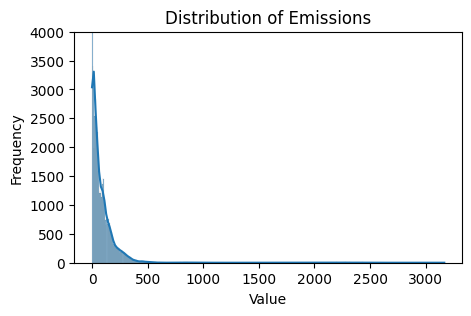

Skew:  10.173825825101622


In [11]:
# Let's check out the distribution of the data 
plt.figure(figsize=(5, 3))
sns.histplot(train_data['emission'], kde=True)
plt.title('Distribution of Emissions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.ylim(0, 4000) 
plt.show()

print('Skew: ', train_data['emission'].skew()) # skewed to the right - we'll figure out how to handle this (if needed) while building our model

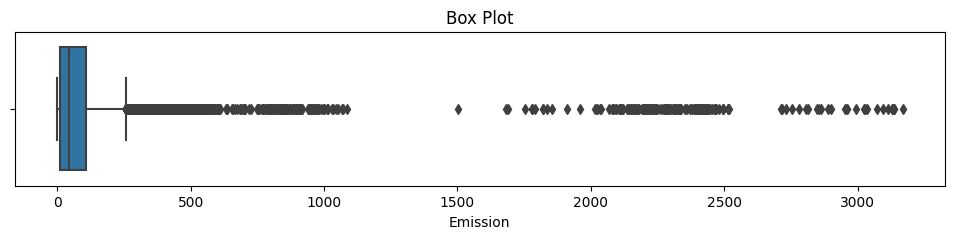

In [12]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=train_data['emission'])
plt.title('Box Plot')
plt.xlabel('Emission')
plt.show()

# most of the emissions are below 500

In [13]:
#missing values

print('Rows with at least 1 missing value: ', train_data.isna().any(axis=1).sum())

# almost all rows have some missing value, so we can't just drop the missing values. 
# We'll handle missing values EDA, before we train our model

Rows with at least 1 missing value:  78585


In [14]:
# Let's find out how many geographical points we have

print(train_data.groupby(['latitude', 'longitude']).size().sort_values())
print(test_data.groupby(['latitude', 'longitude']).size().sort_values())

# there are 497 distinct geographical points, each of which have 159 data points in training set
# and 49 data points in the test set

latitude  longitude
-3.299    30.301       159
-1.444    30.856       159
-1.450    29.350       159
-1.482    30.618       159
-1.486    29.614       159
                      ... 
-2.293    29.507       159
-2.300    29.200       159
-2.301    29.899       159
-2.257    30.243       159
-0.510    29.290       159
Length: 497, dtype: int64
latitude  longitude
-3.299    30.301       49
-1.444    30.856       49
-1.450    29.350       49
-1.482    30.618       49
-1.486    29.614       49
                       ..
-2.293    29.507       49
-2.300    29.200       49
-2.301    29.899       49
-2.257    30.243       49
-0.510    29.290       49
Length: 497, dtype: int64


In [15]:
# we can analyse emissions according to these 497 points
point_mean_emissions = train_data.groupby(['latitude','longitude']).emission.mean().sort_values()
point_mean_emissions

# alot of these points have mean 0 emissions => their prediction should likely be 0

latitude  longitude
-1.682    29.218          0.000000
-2.859    29.041          0.000000
-1.833    28.467          0.000000
-2.841    29.159          0.000000
-1.974    28.526          0.000000
                          ...     
-1.342    31.358        409.606870
-0.956    30.744        455.398039
-1.346    31.254        475.289138
-2.079    29.321       1221.886518
-2.378    29.222       2233.431628
Name: emission, Length: 497, dtype: float64

Geo Visualisation

In [16]:
# Let's visualise these points on a map 

import geopandas as gpd # geosatial data visualisation
from shapely.geometry import Point # representing data as a 2d or 3d point
import folium # for interactive maps
import matplotlib.colors as mcolors


In [ ]:
# we can get a heat map of these points on the geographic map 

point_mean_emissions = point_mean_emissions.reset_index()
geometry = gpd.points_from_xy(point_mean_emissions.longitude, point_mean_emissions.latitude)

# Create point geometries
geometry = gpd.points_from_xy(point_mean_emissions.longitude, point_mean_emissions.latitude)
geo_df = gpd.GeoDataFrame(
    point_mean_emissions, geometry=geometry
)

train_coords_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

norm = plt.Normalize(vmin=np.log1p(point_mean_emissions.emission.min()), vmax=np.log1p(point_mean_emissions.emission.max()))
cmap = plt.get_cmap('coolwarm') 

def get_color(emission):
    return mcolors.to_hex(cmap(norm(np.log1p(emission))))
i=0
# Iterate through list and add a marker for each emission point
for coordinates in geo_df_list: 
    emiss = point_mean_emissions[(point_mean_emissions['latitude']==coordinates[0]) & (point_mean_emissions['longitude']==coordinates[1])]
    emiss = emiss['emission'].iloc[0]
    color = get_color(emiss)
    # Place the markers 
    train_coords_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            fill=True,
            popup= 
            "Coordinates: " + str([round(x, 2) for x in geo_df_list[i]]),
            color = color),
        )
    i = i + 1
train_coords_map.fit_bounds(train_coords_map.get_bounds())
train_coords_map

# looks like the higher emission points are more centrally located.
# also, longitude decides the emission level much more than a point's latitude

Timeseries EDA

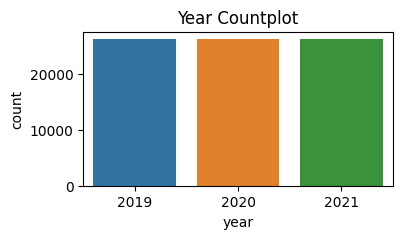

In [ ]:
#now let's analyse this data as a timeseries

plt.figure(figsize=(4,2))
sns.countplot(x='year', data=train_data)
plt.title('Year Countplot')
plt.show()

# each year has the same number of datapoints

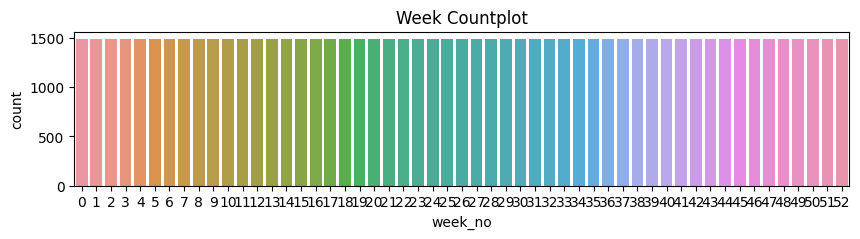

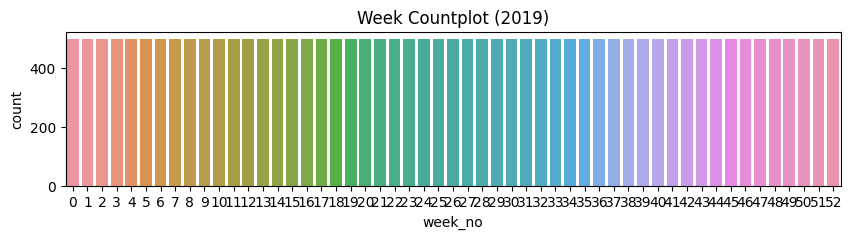

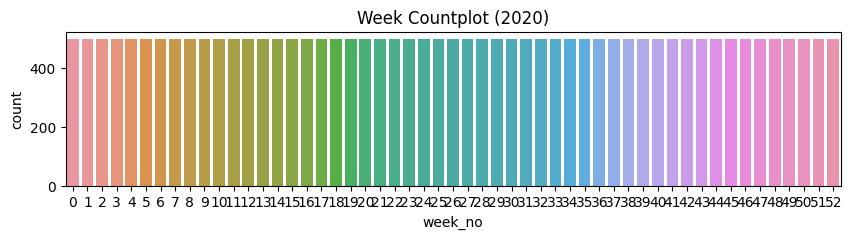

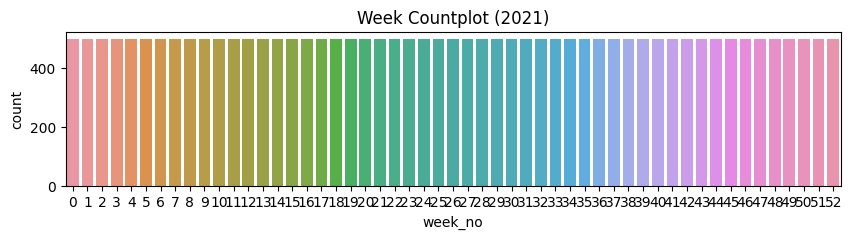

In [19]:
plt.figure(figsize=(10,2))
sns.countplot(x='week_no', data=train_data)
plt.title('Week Countplot')
plt.show()

plt.figure(figsize=(10,2))
sns.countplot(x='week_no', data=train_data[train_data['year']==2019])
plt.title('Week Countplot (2019)')
plt.show()

plt.figure(figsize=(10,2))
sns.countplot(x='week_no', data=train_data[train_data['year']==2020])
plt.title('Week Countplot (2020)')
plt.show()

plt.figure(figsize=(10,2))
sns.countplot(x='week_no', data=train_data[train_data['year']==2021])
plt.title('Week Countplot (2021)')
plt.show()

#each week has the same amount of data points as well, and each year contains equal data for all weeks
# datapoints are evenly spread across the weeks and years

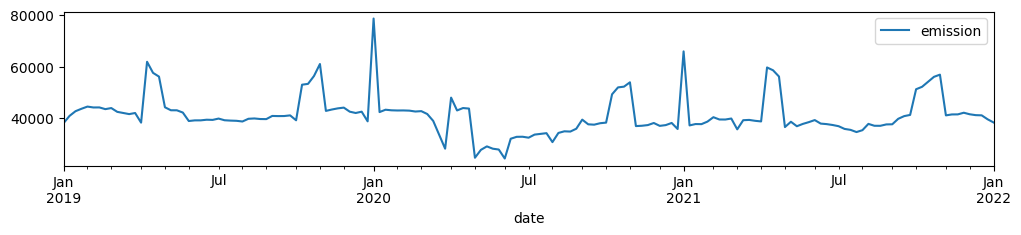

In [20]:
# to analyse the entire data as a time series, we'll consider the sum of weekly emissions
train_data['date'] = pd.to_datetime(train_data['year'].astype(str) + train_data['week_no'].astype(str) + '0', format='%Y%W%w')
weekly_emissions = train_data.groupby(['date'])[['emission']].sum()
weekly_emissions.plot(figsize=(12,2))
plt.show()

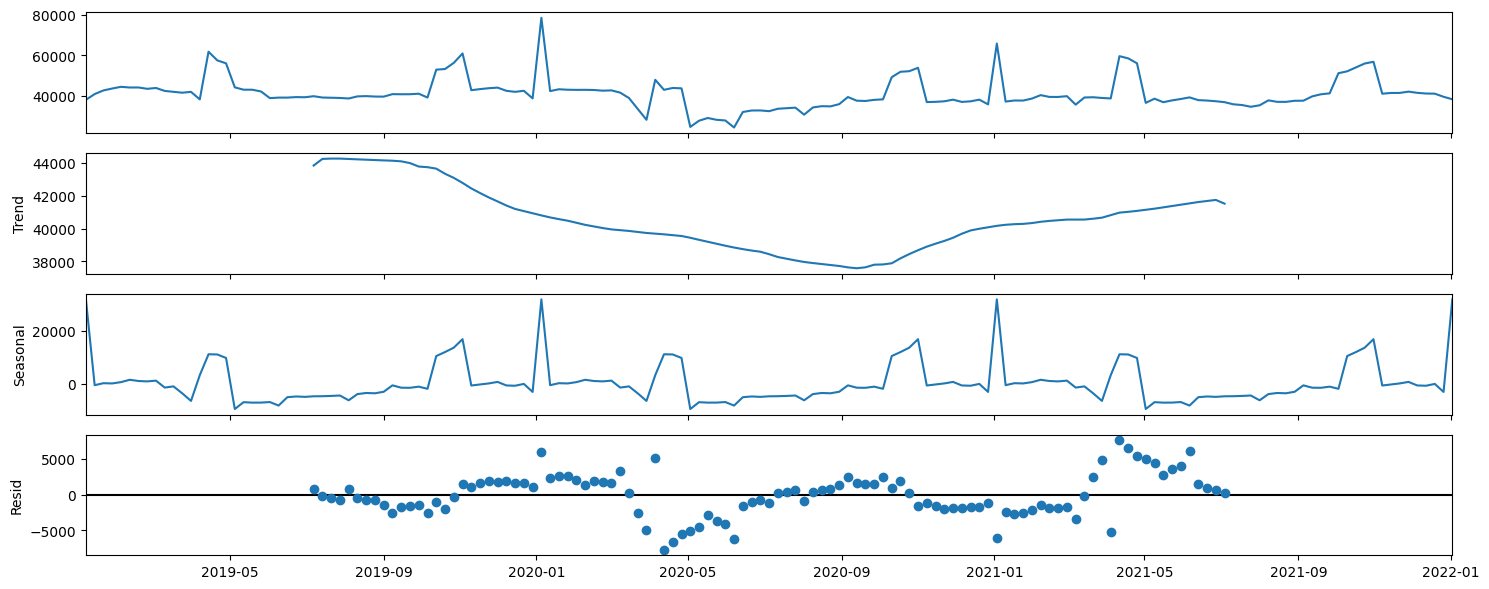

In [21]:
#let's look at its TSA decomposition

import statsmodels.api as sm

rcParams['figure.figsize'] = (15,6)
decomposition = sm.tsa.seasonal_decompose(weekly_emissions, model='additive',period=52)
fig = decomposition.plot()
plt.show()

# we see a decreasing trend in 2020, which can be attributed to COVID.
# Near 2020 end, the emissions start rising again

In [ ]:
#now let's plot the time series of different geo points together

plt.figure(figsize=(13,4))
for _,point in train_data[['latitude','longitude']].drop_duplicates().iterrows():
    ts = train_data[(train_data['latitude']==point.latitude)&(train_data['longitude']==point.longitude)].emission
    plt.plot(range(len(ts)),ts)

plt.title('Time series for every geographical point')
for week in [0, 53, 106, 159]:
    plt.axvline(week, color='k', linestyle='--')

plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

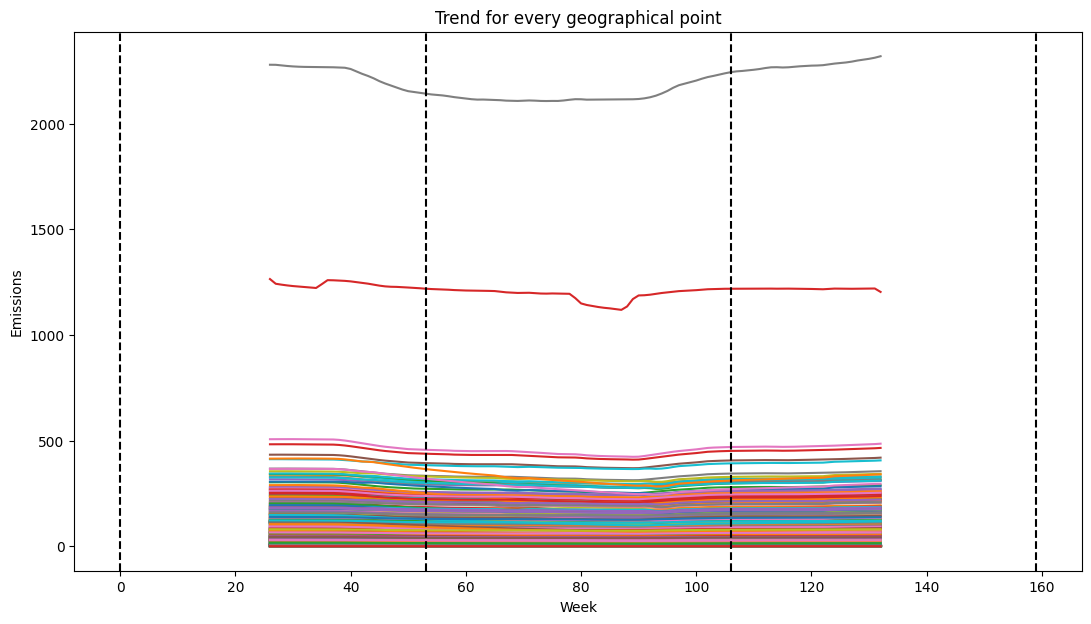

In [23]:
# let's look at each point's trend to see if there are any anomalies
plt.figure(figsize=(13,7))
for _,point in train_data[['latitude','longitude']].drop_duplicates().iterrows():
    ts = train_data[(train_data['latitude']==point.latitude)&(train_data['longitude']==point.longitude)].emission
    decomp = sm.tsa.seasonal_decompose(ts, model='additive',period=52)
    plt.plot(range(len(decomp.trend)),decomp.trend)

plt.title('Trend for every geographical point')
for week in [0, 53, 106, 159]:
    plt.axvline(week, color='k', linestyle='--')

plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

# all series dip at least a little in 2020 and then rise again
# the lowest emitting geo points don't seem to be affected much

Feature Analysis

In [24]:
train_data.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [25]:
# we can pick the most correlated features to train our model on
top20_corrs = abs(train_data.drop(columns=['ID_LAT_LON_YEAR_WEEK']).corr()['emission']).sort_values(ascending = False).head(21)
top20_corrs
# as observed on the map earlier, latitude doesn't seem to be very correlated to a point's emission

emission                                                    1.000000
longitude                                                   0.102746
UvAerosolLayerHeight_aerosol_height                         0.069008
UvAerosolLayerHeight_aerosol_pressure                       0.068138
Cloud_surface_albedo                                        0.046587
CarbonMonoxide_H2O_column_number_density                    0.043217
CarbonMonoxide_CO_column_number_density                     0.041328
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.040263
UvAerosolLayerHeight_aerosol_optical_depth                  0.040156
UvAerosolLayerHeight_sensor_azimuth_angle                   0.035142
NitrogenDioxide_solar_azimuth_angle                         0.033417
Formaldehyde_tropospheric_HCHO_column_number_density        0.033333
SulphurDioxide_solar_azimuth_angle                          0.032338
Formaldehyde_solar_azimuth_angle                            0.030815
NitrogenDioxide_sensor_altitude   

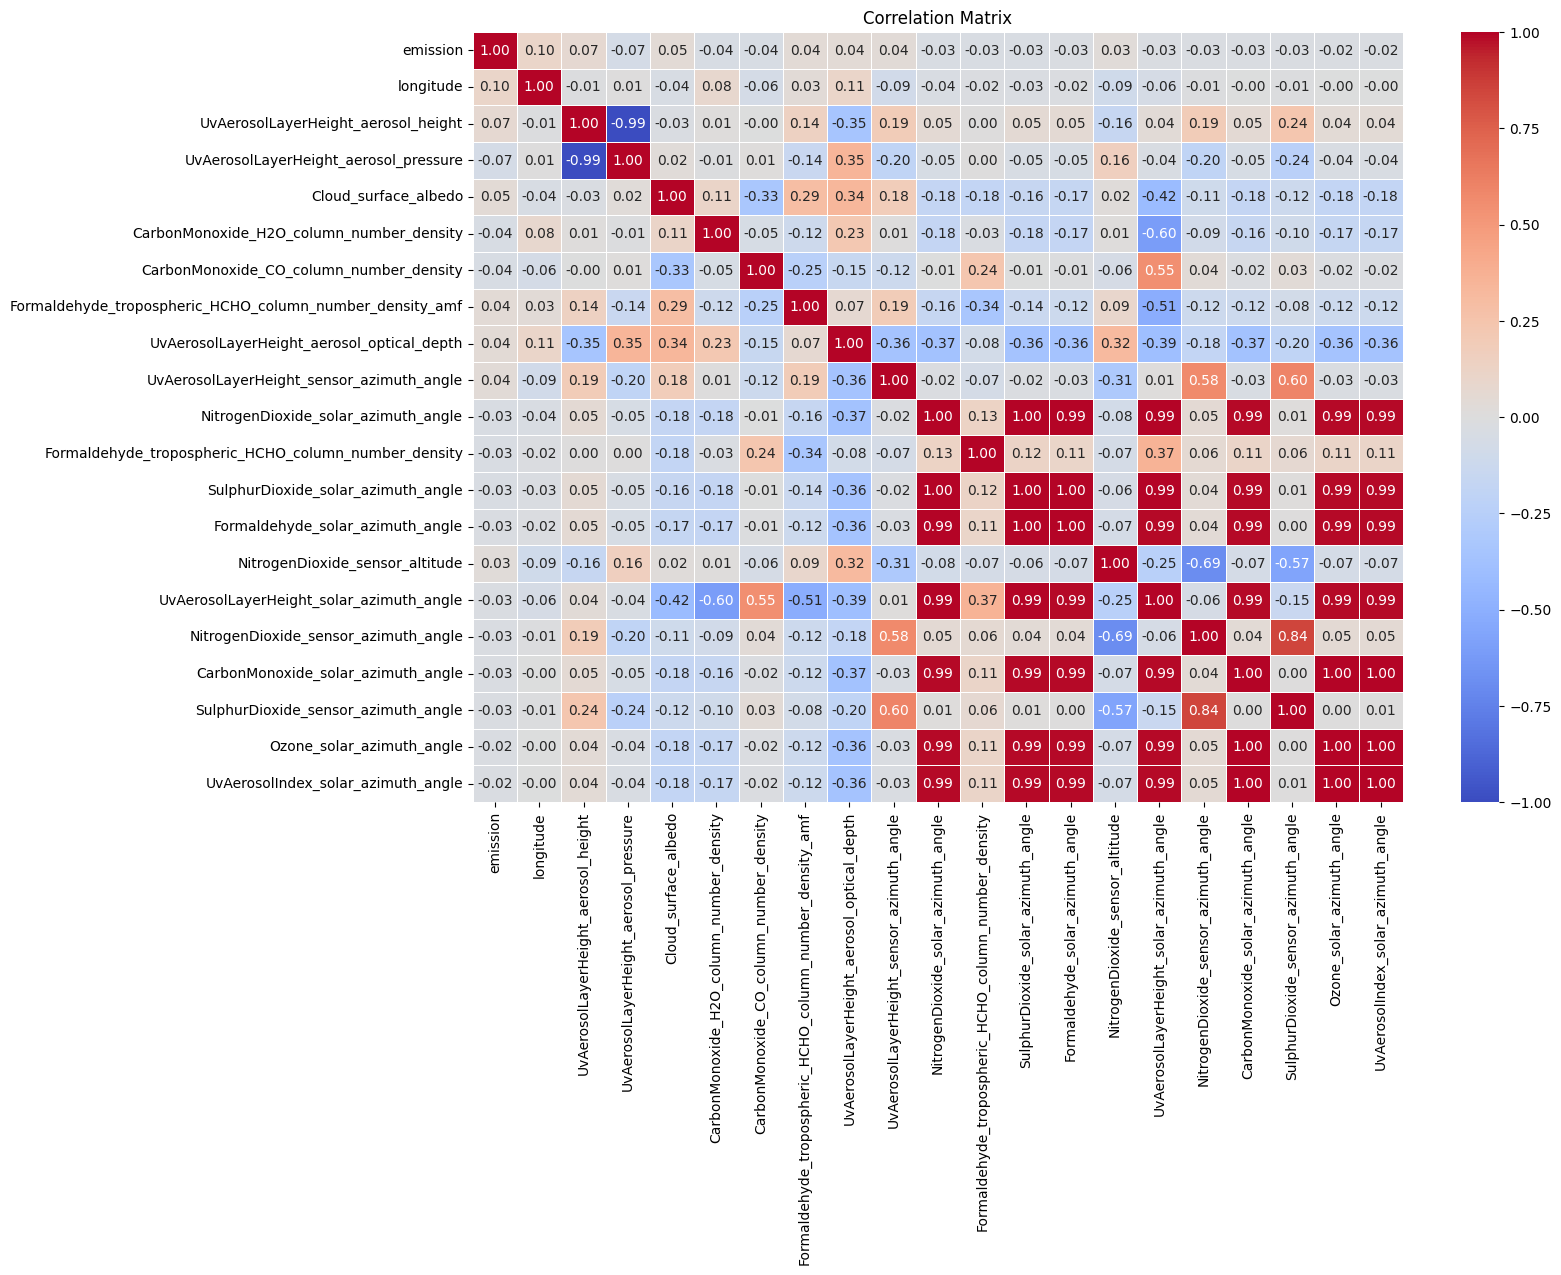

In [ ]:
corr_matrix=train_data[list(top20_corrs.keys())].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# we can see that some variables are highly correlated. 
# for starters, we can pick 3 features to train our model on (in addition to year and week_no)
# the first should intuitively be longitude already
# UvAerosolLayerHeight_aerosol_height is not correlated to longitude, so let this be the 2nd feature
# UvAerosolLayerHeight_aerosol_pressure is almost perfectly negatively correlated to vAerosolLayerHeight_aerosol_height, so we don't get any new info and skip this feature
# 

Decision Tree Classifier

In [28]:
# the data is non linear, so linear regression definitely will not work.
# let's try out a Decision tree Classifier
# However, as observed in the time series decomposition, the year 2020 was an outlier due to covid. We will need to drop the 2020 data to avoid polluting our predictions
# Additionally, we'll have to handle the missing values. Since we have geographical data, let's to use values from nearby locations instead of missing values

# Handling missing values

train_data = train_data.sort_values(by='longitude')
geo_df_list.sort() #geo_df_list is a list of all distinct points. 
geo_df_list
n= len(geo_df_list)

imputed_nocovid = pd.DataFrame(columns=train_data.columns)

for y in [2019,2020,2021]:
    for w in range(53):
        if y==2019 or (y==2020 and w<=8) or (y==2021 and w>8):
            subset = train_data[(train_data['year']==y)&(train_data['week_no']==w)]
            subset=subset.reset_index()
            subset=subset.sort_values(by='longitude',ascending=True)
            print(f'Working on {y}-{w}...')
            for i in range(n):
                for col in ['UvAerosolLayerHeight_aerosol_height', 'Cloud_surface_albedo', 'CarbonMonoxide_H2O_column_number_density']:
                    k=1
                    while pd.isna(subset.loc[i,col]) and k<10 and i+k<n:
                        subset.loc[i,col]=subset.loc[i+k,col]
                        k+=1
                    k=1         
                    while pd.isna(subset.loc[i,col]) and k<10 and i-k>=0:
                        subset.loc[i,col]=subset.loc[i-k,col]
                        k+=1

        imputed_nocovid=pd.concat([imputed_nocovid,subset],axis=0)
        


Working on 2019-0...


/tmp/ipykernel_33/3696313175.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  imputed_nocovid=pd.concat([imputed_nocovid,subset],axis=0)


Working on 2019-1...
Working on 2019-2...
Working on 2019-3...
Working on 2019-4...
Working on 2019-5...
Working on 2019-6...
Working on 2019-7...
Working on 2019-8...
Working on 2019-9...
Working on 2019-10...
Working on 2019-11...
Working on 2019-12...
Working on 2019-13...
Working on 2019-14...
Working on 2019-15...
Working on 2019-16...
Working on 2019-17...
Working on 2019-18...
Working on 2019-19...
Working on 2019-20...
Working on 2019-21...
Working on 2019-22...
Working on 2019-23...
Working on 2019-24...
Working on 2019-25...
Working on 2019-26...
Working on 2019-27...
Working on 2019-28...
Working on 2019-29...
Working on 2019-30...
Working on 2019-31...
Working on 2019-32...
Working on 2019-33...
Working on 2019-34...
Working on 2019-35...
Working on 2019-36...
Working on 2019-37...
Working on 2019-38...
Working on 2019-39...
Working on 2019-40...
Working on 2019-41...
Working on 2019-42...
Working on 2019-43...
Working on 2019-44...
Working on 2019-45...
Working on 2019-46.

In [29]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(imputed_nocovid[['longitude', 'UvAerosolLayerHeight_aerosol_height', 'Cloud_surface_albedo', 'CarbonMonoxide_H2O_column_number_density', 'week_no']], imputed_nocovid.emission)
y_pred = model.predict(test_data[['longitude', 'UvAerosolLayerHeight_aerosol_height', 'Cloud_surface_albedo', 'CarbonMonoxide_H2O_column_number_density', 'week_no']])
submission_nocovid = pd.Series(y_pred, name='emission', index=test_data.index)

plt.figure(figsize=(8,3))
plt.plot(range(49),submission_nocovid.groupby(test_data.week_no).mean())

# this model is wildly unpredictable, yielding very different predictions each time
# this might be because of the imputed values, as many missing values had to be approximated as a neighbouring point's value
# the result is similar for any combination of the the columns - use of any column with imputed values makes the predictions unreliable

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# since we only have complete data for longitude, latitude, year and week no, let's fit our model based on that

model = DecisionTreeRegressor()
model.fit(imputed_nocovid[['longitude', 'latitude', 'week_no']], imputed_nocovid.emission)
y_pred = model.predict(test_data[['longitude', 'latitude', 'week_no']])
submission_nocovid = pd.Series(y_pred, name='emission', index=test_data.index)

plt.figure(figsize=(8,3))
plt.plot(range(49),submission_nocovid.groupby(test_data.week_no).mean())

#since submissions are closed, I can't really check the accuracy of the predictions right now

Time Series Approach

In [ ]:
# now, as seen from the time series decomposition of the 497 geo points, the emissions themselves seem to be pretty correlated. 
# As suggested in Abrosm's discussion post, we can perform PCA on these 497 emissions

emission = train_data.pivot(index=['latitude', 'longitude'], 
                       columns=['year', 'week_no'], values='emission')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
emission_standardized = scaler.fit_transform(emission)
pca = PCA(n_components=10) 
emission_pca = pca.fit_transform(emission_standardized)

In [ ]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance')
plt.show()

# we see that the first 5 components themselves cover almost all of the variance shon by the data. 
# Thus, it suffices to make predictions for these 5 principal components instead of all 497 geo points!

In [ ]:
emission.columns = ['_'.join([str(col[0]),str(col[1])]) for col in emission.columns]
plt.figure(figsize=(13, 5))
components=pca.components_[:5]
df=pd.DataFrame(components,columns= emission.columns)
for i, row in df.iterrows():
    plt.plot(df.columns,row, label=f'Component {i}')

for week in [0, 53, 106, 159]:
    plt.axvline(week, color='k', linestyle='--')

plt.xlabel('Features')
plt.ylabel('Component Value')
plt.title('Principal Components')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90, ha='center')
plt.show()

# we observe that - 
# 1. Component 1 peaks in Jan and Feb
# 2. Component 2 rises in May and October
# 3. Component 3 shows sudden peak after Februrary - possibly due to covid